In [45]:
import pandas as pd, matplotlib.pyplot as plt
from prophet import Prophet

In [46]:
df = pd.read_csv('../data/소비자물가지수_11131103.csv')
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014/01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
1,2014/02,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
2,2014/03,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
3,2014/04,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
4,2014/05,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['계정항목'] = df['계정항목'].str.replace('/', '-')

In [48]:
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014-01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
1,2014-02,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
2,2014-03,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
3,2014-04,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
4,2014-05,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df['계정항목'] = pd.to_datetime(df['계정항목'])

In [50]:
df = df.iloc[:133, :]

In [51]:
df.iloc[0, :]

계정항목                2014-01-01 00:00:00
총지수                               93.73
  식료품 및 비주류음료                    85.705
    식료품                          85.143
      빵 및 곡물                     87.809
                           ...         
        부동산중개수수료                103.305
        행정수수료                     100.0
        대입전형료                   116.808
        시험응시료                    84.324
        장례비                      91.836
Name: 0, Length: 582, dtype: object

In [52]:
df.columns = df.columns.str.strip()

In [53]:
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014-01-01,93.730,85.705,85.143,87.809,87.742,NaN,86.922,107.760,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.836
1,2014-02-01,93.980,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.896
2,2014-03-01,94.153,86.810,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,84.324,91.999
3,2014-04-01,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,89.419,92.112
4,2014-05-01,94.369,86.741,86.165,88.480,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.00,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-01,114.650,124.720,125.050,117.880,98.350,104.13,101.390,142.690,105.670,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.440
129,2024-10-01,114.690,124.530,124.740,119.010,99.180,104.00,101.340,143.840,105.710,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.510
130,2024-11-01,114.400,121.320,121.240,119.440,99.880,105.28,104.690,149.160,105.820,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.510
131,2024-12-01,114.910,123.610,123.520,121.150,99.380,108.51,111.300,158.420,106.630,...,88.860,112.870,163.55,94.450,100.00,92.280,98.67,94.030,116.100,108.580


In [54]:
a = df.columns[0]
b = df.columns[4:145].tolist()
b.insert(0, a)
c = df.columns[146:156].tolist()
d = df.columns[158:165].tolist()
e = df.columns[490:530].tolist()
e

['음식 서비스',
 '김치찌개백반',
 '된장찌개백반',
 '비빔밥',
 '설렁탕',
 '갈비탕',
 '삼계탕',
 '해물찜',
 '해장국',
 '불고기',
 '쇠고기(외식)',
 '돼지갈비(외식)',
 '삼겹살(외식)',
 '오리고기(외식)',
 '냉면',
 '칼국수',
 '죽(외식)',
 '생선초밥',
 '생선회(외식)',
 '자장면',
 '짬뽕',
 '탕수육',
 '볶음밥',
 '돈가스',
 '스테이크',
 '스파게티',
 '라면(외식)',
 '김밥',
 '떡볶이',
 '치킨',
 '햄버거',
 '피자',
 '쌀국수',
 '커피(외식)',
 '기타음료(외식)',
 '소주(외식)',
 '맥주(외식)',
 '막걸리(외식)',
 '구내식당식사비',
 '도시락']

In [55]:
df = df[b + c + d + e]

In [56]:
df.to_csv('../data/price_level_index.csv', index=False)

In [57]:
df

,계정항목,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,땅콩,혼식곡,밀가루,...,햄버거,피자,쌀국수,커피(외식),기타음료(외식),소주(외식),맥주(외식),막걸리(외식),구내식당식사비,도시락
0,2014-01-01,87.809,87.742,NaN,86.922,107.760,83.926,87.280,112.772,100.345,...,89.456,95.728,NaN,91.729,98.269,77.564,87.851,92.498,81.815,NaN
1,2014-02-01,88.665,87.728,NaN,86.846,108.985,83.679,87.280,110.615,100.362,...,90.142,99.119,NaN,92.191,98.269,77.930,87.881,92.779,81.837,NaN
2,2014-03-01,88.473,87.212,NaN,86.959,110.481,82.455,87.494,108.909,102.137,...,90.609,99.119,NaN,92.226,98.287,78.079,88.226,92.951,82.146,NaN
3,2014-04-01,88.547,87.205,NaN,86.751,111.633,81.994,88.530,106.609,102.554,...,90.609,99.119,NaN,92.380,98.287,78.095,88.172,92.951,82.641,NaN
4,2014-05-01,88.480,86.641,NaN,86.286,112.417,80.851,87.369,108.969,102.393,...,90.609,99.119,NaN,92.541,98.335,78.266,88.461,92.951,82.613,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-01,117.880,98.350,104.13,101.390,142.690,105.670,118.220,109.920,132.490,...,132.010,111.080,121.69,106.030,104.760,114.450,117.210,118.600,121.930,122.60
129,2024-10-01,119.010,99.180,104.00,101.340,143.840,105.710,118.680,110.990,135.410,...,132.010,120.460,122.08,105.280,104.780,114.510,117.350,119.400,121.930,129.28
130,2024-11-01,119.440,99.880,105.28,104.690,149.160,105.820,119.540,111.280,137.870,...,133.820,118.780,122.16,106.780,105.670,114.920,117.400,119.520,121.950,132.88
131,2024-12-01,121.150,99.380,108.51,111.300,158.420,106.630,120.440,111.970,137.430,...,133.820,118.780,122.32,106.790,105.620,114.780,117.330,119.520,121.950,132.88


In [58]:
df_1 = df[['계정항목', '빵 및 곡물']] # 곡물 자리는 입력 받기

In [59]:
df_1

,계정항목,빵 및 곡물
0,2014-01-01,87.809
1,2014-02-01,88.665
2,2014-03-01,88.473
3,2014-04-01,88.547
4,2014-05-01,88.480
...,...,...
128,2024-09-01,117.880
129,2024-10-01,119.010
130,2024-11-01,119.440
131,2024-12-01,121.150


In [60]:
df_1.columns = ['ds', 'y']

In [61]:
model = Prophet() # 매번 새로운 모델. -> py 파일에서 선언해줄 것

In [62]:
model.fit(df_1)

14:08:50 - cmdstanpy - INFO - Chain [1] start processing
14:08:50 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = model.make_future_dataframe(periods=36, freq='M')

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [64]:
future

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
164,2027-08-31
165,2027-09-30
166,2027-10-31
167,2027-11-30


In [73]:
forecast = model.predict(future)
forecast.loc[forecast['ds']== '2025-01-01', :]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
132,2025-01-01,121.382332,120.443704,122.480924,121.382332,121.382332,0.135217,0.135217,0.135217,0.135217,0.135217,0.135217,0.0,0.0,0.0,121.517549


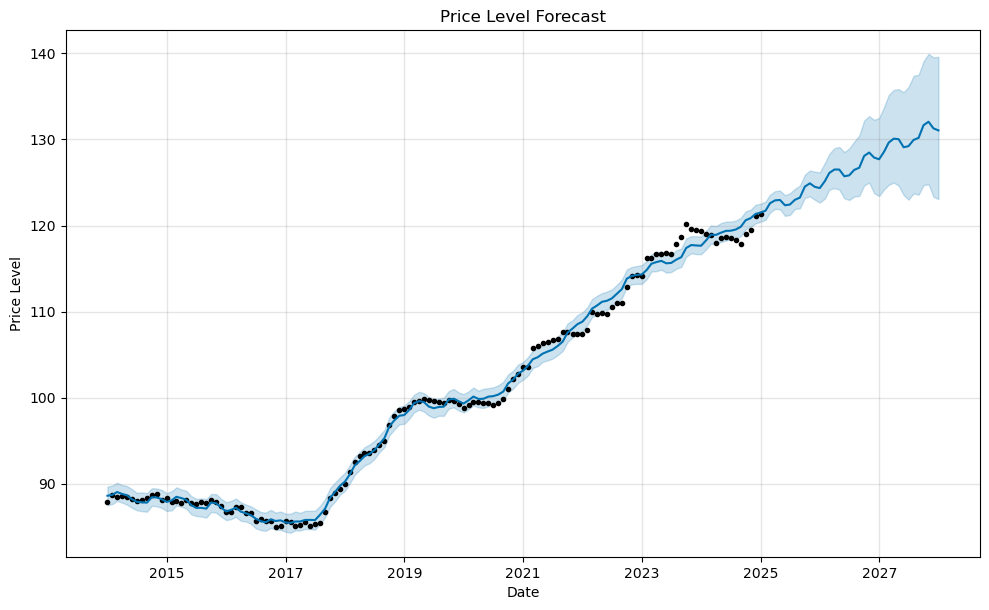

In [66]:
model.plot(forecast)
plt.title('Price Level Forecast')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.show()

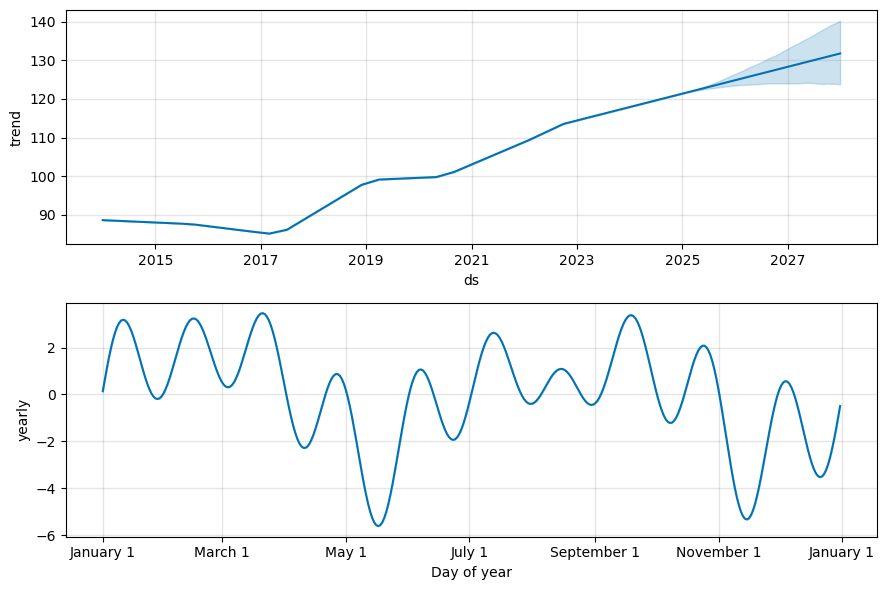

In [67]:
model.plot_components(forecast)
plt.show() # 아마 추석 연휴라 9~10월 전후해 물가 상승이 커지는 듯

In [68]:
forecast.loc[forecast['ds'] == '2025-01-31', 'trend'].values[0]

121.66807513583807

In [69]:
# 현재 대비 특정 시점의 물가 상승률 (%)
(forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0] / df_1.iloc[df_1.index.max(), 1]) * 100

102.90064590967923

In [70]:
forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0]  / df_1.iloc[df_1.index.max(), 1]

1.0290064590967922